In [2]:
#Importing the required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split # importing dataset from sklearn
import numpy as np

In [3]:
news = datasets.fetch_20newsgroups()    # loading data from datasets 
x = news.data # taking input into x
y = news.target # taking output into y

In [4]:
# splitting input and output data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1) 

In [5]:
x_test

["From: johnsw@wsuvm1.csc.wsu.edu (William E. Johns)\nSubject: Need a wheel\nOriginator: bill@wsuaix.csc.wsu.edu\nKeywords: '92\nOrganization: Washington State University\nDistribution: na\nLines: 18\n\n\nDoes anyone have a rear wheel for a PD they'd like to part with?\n\nDoes anyone know where I might find one salvage?\n\nAs long as I'm getting the GIVI luggage for Brunnhilde and have\nthe room, I thought I'd carry a spare.\n\nRide Free,\n\nBill\n___________________________________________________________________             \njohnsw@wsuvm1.csc.wsu.edu  prez=BIMC  KotV KotRR                                \nDoD #00314  AMA #580924   SPI = 7.18   WMTC #0002  KotD #0001             \nYamabeemer fj100gs1200pdr650 Special and a Volvo.  What more could anyone ask? \n                                                           \nPain is inevitable, suffering is optional.\n \n",
 'From: mls@panix.com (Michael Siemon)\nSubject: hating the sin but not the sinner?\nOrganization: PANIX Public Acce

In [6]:
x_train[0]

'From: turpin@cs.utexas.edu (Russell Turpin)\nSubject: Re: Science and methodology (was: Homeopathy ... tradition?)\nOrganization: CS Dept, University of Texas at Austin\nLines: 123\nDistribution: inet\nNNTP-Posting-Host: im4u.cs.utexas.edu\nSummary: More in response to Lee Lady.\nKeywords: science   errors   Turpin   NLP\n\n-*----\nI think that part of the problem is that I have proposed a\ndefinition of science that I intended to be interpreted broadly\nand that Lee Lady has interpreted fairly narrowly.  My definition\nis this: Science is the investigation of the empirical that avoids\nmistakes in reasoning and methodology discovered from previous\nwork.  Lee Lady writes:\n\n> I don\'t think that science should be defined in a way that some \n> of the activities that lead to really important science --- namely\n> thinking and informal exploration --- are not recognized as\n> scientific work.  \n\nUnless one classifies "thinking and informal exploration" as a\nmistake, they fall under

In [7]:
words=[] #Initialising an empty list to append all the words of the documents by iterating to each document
for i in range(len(x_train)): # Iterating through each document
    words.append(x_train[i].split(' ')) #Splitting each word of the document by space

In [8]:
#The common words that are needed to be removed while making vocabulary of words as features
stop_words = ['a', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards',
              'again', 'against', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also'
              'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 
              'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 
              'appropriate', 'are', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 
              'away', 'awfully', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 
              'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better',
              'between', 'beyond', 'both', 'brief', 'but', 'by', 'came', 'can', 'cannot', 'cant', 'cause', 'causes', 
              'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently',
              'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', 'course', 
              'currently', 'definitely', 'described', 'despite', 'did', 'different', 'do', 'does', 'doing', 
              'done', 'down', 'downwards', 'during', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 
              'enough', 'entirely', 'especially', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 
              'everywhere', 'ex', 'exactly', 'example', 'except', 'far', 'few', 'fifth', 'first', 'five', 'followed',
              'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 
              'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 
              'had', 'happens', 'hardly', 'has', 'have', 'having', 'he', 'hello', 'help', 'hence', 'her', 'here', 
              'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 
              'hopefully', 'how', 'however', 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 
              'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', 'it', 'its', 
              'itself', 'just', 'keep', 'keeps', 'kept', 'know', 'known', 'knows', 'last', 'lately', 'later', 'latter', 
              'latterly', 'least', 'less', 'lest', 'let', 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 
              'ltd', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 
              'most', 'mostly', 'much', 'must', 'my', 'myself', 'name', 'namely', 'near', 'nearly', 'necessary', 'need', 
              'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 
              'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 
              'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 
              'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'particular', 'particularly', 'per', 
              'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'quite', 'rather', 
              'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 'said', 
              'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 
              'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 
              'she', 'should', 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 
              'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 
              'such', 'sup', 'sure', 'take', 'taken', 'tell', 'tends', 'than', 'thank', 'thanks', 'thanx', 'that', 'thats', 
              'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 
              'therein', 'theres', 'thereupon', 'these', 'they', 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 
              'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 
              'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 
              'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'value', 'various', 
              'very', 'via', 'viz', 'vs', 'want', 'wants', 'was', 'way', 'we', 'welcome', 'well', 'went', 'were', 'what', 
              'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 
              'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 
              'willing', 'wish', 'with', 'within', 'without', 'wonder', 'would', 'yes', 'yet', 'you', 'your', 'yours', 
              'yourself', 'yourselves', 'zero','The','This','What','You','And','They','But','There','How']

In [9]:
# I tried using i.lower() to make all the words in lowercase but my score went down so i am not using i.lower() function
import itertools # Importing required lib to convert 2-D list into 1-D list
vocabulary={} #Initialising an empty dictionary to store the count of each word of our features
# Converting 2-D list into 1-D list
list2d = [i for i in words]
list_words = list(itertools.chain(*list2d))
# Storing the count of each word in the dictionary
for i in list_words: #Iterating through each word and checking if to select it for feature or not
# We will not consider words as our features if the word is stop word or length of word is less than equal to 2 or is not an alpha
    if i in stop_words or not(i.isalpha()) or len(i)<=2:
        continue
    else:    
        if i in vocabulary: # If the word is considered as feature then we will increment it in our dictionary
            vocabulary[i]+=1
        else:
            vocabulary[i]=1

In [10]:
vocab=sorted(vocabulary.items(), key=lambda kv: kv[1],reverse=True) #Sorting dictionary in descending order to select top k words as our features 

In [11]:
vocab # All the words with their frequencies

[('article', 5703),
 ('people', 3699),
 ('University', 2981),
 ('also', 2661),
 ('good', 2289),
 ('make', 2163),
 ('time', 1913),
 ('find', 1477),
 ('work', 1279),
 ('back', 1278),
 ('made', 1140),
 ('problem', 1139),
 ('system', 1127),
 ('God', 1099),
 ('read', 1088),
 ('Computer', 1083),
 ('New', 1083),
 ('number', 1077),
 ('give', 1074),
 ('point', 1047),
 ('things', 1029),
 ('part', 1001),
 ('For', 987),
 ('years', 986),
 ('set', 952),
 ('file', 946),
 ('put', 942),
 ('government', 933),
 ('information', 916),
 ('long', 899),
 ('question', 888),
 ('lot', 868),
 ('program', 862),
 ('thing', 853),
 ('run', 839),
 ('data', 813),
 ('key', 790),
 ('hard', 782),
 ('State', 775),
 ('year', 775),
 ('power', 769),
 ('called', 768),
 ('found', 768),
 ('When', 748),
 ('THE', 747),
 ('fact', 745),
 ('Why', 742),
 ('drive', 741),
 ('bit', 733),
 ('send', 731),
 ('That', 725),
 ('real', 701),
 ('heard', 688),
 ('thought', 683),
 ('Apr', 674),
 ('public', 673),
 ('support', 659),
 ('message', 657

In [12]:
import matplotlib.pyplot as plt #Importing library to make graphs

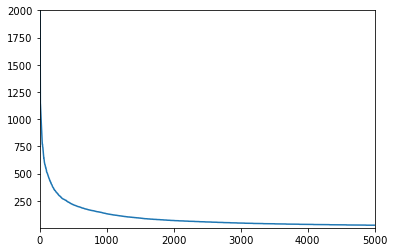

In [13]:
#Plotting the graph between frequency of words and the number of words.
x=[]
y=[]
for i in range(len(vocab)):
    x.append(i)
    y.append(vocab[i][1])
plt.axis([0,5000,1,2000])    
plt.plot(x,y)

In [14]:
#After observing the graph we will be choosing the words between the range from 40 to 2500.
features=[vocab[i][0] for i in range(40,2500)]
print(features)

['power', 'called', 'found', 'When', 'THE', 'fact', 'Why', 'drive', 'bit', 'send', 'That', 'real', 'heard', 'thought', 'Apr', 'public', 'support', 'message', 'case', 'means', 'great', 'makes', 'list', 'car', 'person', 'call', 'reason', 'law', 'kind', 'Windows', 'end', 'line', 'post', 'version', 'start', 'based', 'order', 'team', 'All', 'free', 'high', 'Jesus', 'Research', 'told', 'left', 'current', 'window', 'idea', 'April', 'local', 'problems', 'day', 'pretty', 'state', 'game', 'card', 'world', 'big', 'bad', 'small', 'running', 'space', 'American', 'software', 'large', 'Does', 'One', 'buy', 'true', 'human', 'Turkish', 'National', 'files', 'place', 'evidence', 'group', 'gun', 'show', 'NOT', 'play', 'interested', 'life', 'Space', 'feel', 'Any', 'change', 'simply', 'chip', 'money', 'code', 'source', 'John', 'opinions', 'Institute', 'answer', 'couple', 'man', 'original', 'provide', 'hope', 'working', 'making', 'standard', 'live', 'Israeli', 'mail', 'access', 'understand', 'Christian', 'Je

In [15]:
# Making our training data organised by organising it into a 2-d numpy array 
x_train_dataset=np.zeros([len(x_train),len(features)],int) #Initialising a 2-d numpy array with total rows as length of training data and column number as total nukber of features
for i in range(len(x_train)): #Iterating throught each document and splitting it into words
    document_words=x_train[i].split(' ')
    for j in document_words: # Checking if the word is present in our vocab dictionary
         if j in features:
            x_train_dataset[i][features.index(j)]+=1 # If it is present then incrementing the words's count

In [16]:
x_train_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
#Similarly following the above process for test data
x_test_dataset=np.zeros([len(x_test),len(features)],int)
for i in range(len(x_test)):
    document_words=x_test[i].split(' ')
    for j in document_words:
         if j in features:
            x_test_dataset[i][features.index(j)]+=1

In [18]:
x_test_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Using Inbuilt Naive Bayes 

In [19]:
# Importing inbuilt Multinomial Niave Bayes to calculate the score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
# Training our machine on the inbuilt multinomial naive bayes and predicting the output
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train)) # Calculating the score
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred)) # Printing the confusion matrix
print(classification_report(y_test,y_pred)) #Printing the report

Score on training data: 0.8437438617167551
Score on testing data: 0.7473498233215548
[[38  0  0  0  0  0  0  1  0  1  0  0  0  0  0  2  1  3  2  6]
 [ 0 32  5  3  3  5  1  0  1  1  0  0  0  0  4  1  1  0  0  0]
 [ 0  2 50  2  1  2  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  2  4 47  7  3  3  0  0  1  0  0  3  0  0  0  0  0  0  0]
 [ 0  1  4  4 43  0  2  2  0  0  0  0  3  2  0  0  0  0  0  0]
 [ 0  7  8  0  1 36  0  0  0  0  0  0  0  1  2  0  1  0  1  0]
 [ 0  4  0  4  0  1 50  0  1  1  1  1  5  0  1  0  0  1  2  0]
 [ 0  1  0  1  1  0  1 37  5  0  0  0  1  0  0  0  1  0  0  1]
 [ 1  0  0  0  0  0  2  5 39  1  0  0  0  1  0  1  1  0  0  0]
 [ 1  2  0  0  0  0  0  0  0 39  3  0  3  1  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  5 44  0  0  0  0  2  1  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0 49  1  1  0  0  1  0  1  0]
 [ 0  1  0  5  2  2  2  4  1  0  0  1 38  2  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 51  0  0  0  1  1  1]
 [ 0  3  0  1  0  0  1  0  1  0  

## Implementing our own Naive Bayes

In [21]:
# FIT -> training the algorithm over training data
# Returns the dictionary that would be used to make predictions
def fit(x_train_dataset,y_train):
    count={} # Initialising dictionary which will be nested 
    #First Level of dictionary will contain the total number of classes and each class as its keys
    #Second level of dicitonary will contain total count of a class,total number of words in a class and number of words(features) of each class as their keys
    y_train=np.array(y_train) #Converting the list into numpy array
    classes=set(y_train) #This will give us all the different classes in the dataset
    count['total_number_of_classes']=len(y_train) # This will give us the total number of classes present in the dataset
    #Iterating through each class to calculate the number of words(features) of each class and total number of words present in a class
    for current_class in classes: 
        temp=0
        count[current_class]={} # Initialising the second level of nested dictionary
        x_train_current=x_train_dataset[(y_train==current_class)] # THis will only give the us the rows of the current class
        y_train_current=y_train[(y_train==current_class)]  
        count[current_class]["total_count_of_a_class"]=len(y_train_current)
        for i in range(len(features)): # finding sum of values of all features in curent class
            count[current_class][i] = x_train_current[:,i].sum()
            temp+=count[current_class][i]
        count[current_class]["total_words_in_a_class"]=temp
    return count    

In [28]:
# PROBABILITY -> 
# dictionary[current_class]["total_count_of_a_class"] gives num of data points belonging to current class
# dictionary["total_number_of_classes"] gives total num of training data points
def probability(x,dic,current_class):
    output = np.log(dic[current_class]["total_count_of_a_class"]) - np.log(dic["total_number_of_classes"])
    for j in range(len(x)): 
            if x[j]==0: #Checking if the word is presnt in out vocab dictionary
                continue # IF not then continue
            #If present then we will calculate it's probability and sum it to the sum of each word probability in the test data    
            count_curr_class_equal_xj = dic[current_class][j] + 1
            count_curr_class = dic[current_class]["total_words_in_a_class"] + len(features)
            curr_xj_prob = np.log(count_curr_class_equal_xj) - np.log(count_curr_class)
            output = output + curr_xj_prob
    
    return output


In [23]:
# Making prediction for one data point
#This function will return the best class with highest probability
def predict_for_single(x_test,dic):
    first_run=True
    classes=list(dic.keys()) # getting all the classes
    for i in classes: #Iterating through each  
        if i=="total_number_of_classes":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            best_class=i
            first_run=False
    return best_class

In [24]:
#Predicting the output class 
def predict(x_test,dic):
    y_pred=[] # Appending the predictions 
    for x in x_test: #Iterating through each test data point
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [25]:
#Calculating the score
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)   

In [26]:
# Fitting the data and getting the required dictionary
dictionary=fit(x_train_dataset,y_train)
dictionary[0].keys()

dict_keys(['total_count_of_a_class', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214

In [29]:
y_pred=predict(x_test_dataset,dictionary) #Calling the predict function to get the predictions in y_pred list

In [30]:
print(y_pred) #printing the predictions

[8, 19, 15, 0, 16, 19, 15, 9, 16, 5, 14, 10, 16, 13, 14, 16, 8, 2, 16, 11, 15, 2, 13, 2, 15, 2, 14, 2, 11, 15, 10, 2, 10, 6, 14, 12, 15, 3, 8, 4, 9, 4, 0, 19, 10, 3, 11, 14, 15, 5, 14, 8, 11, 2, 8, 5, 4, 4, 2, 3, 7, 14, 0, 9, 17, 4, 1, 0, 0, 18, 10, 16, 18, 5, 14, 15, 13, 15, 1, 5, 16, 19, 18, 3, 2, 9, 18, 15, 9, 2, 14, 4, 2, 1, 0, 4, 15, 3, 0, 4, 2, 18, 7, 6, 7, 1, 3, 3, 5, 18, 10, 6, 14, 11, 15, 1, 2, 2, 7, 9, 0, 11, 12, 10, 2, 9, 6, 7, 9, 18, 17, 2, 3, 16, 14, 13, 16, 11, 2, 14, 12, 6, 5, 12, 17, 0, 15, 15, 8, 6, 13, 7, 14, 13, 7, 12, 12, 12, 17, 15, 6, 3, 4, 11, 8, 3, 4, 15, 10, 6, 14, 12, 12, 5, 13, 13, 2, 16, 9, 0, 18, 16, 4, 9, 4, 6, 16, 19, 16, 4, 8, 0, 4, 13, 11, 6, 3, 16, 15, 4, 10, 7, 14, 11, 11, 3, 6, 18, 0, 13, 18, 19, 4, 18, 5, 9, 3, 5, 3, 1, 12, 12, 19, 8, 8, 19, 1, 15, 0, 9, 4, 4, 3, 13, 15, 2, 7, 2, 16, 13, 16, 3, 16, 18, 10, 6, 9, 17, 13, 6, 7, 3, 10, 13, 19, 0, 1, 9, 8, 1, 1, 9, 18, 9, 2, 11, 10, 12, 17, 15, 16, 11, 7, 1, 13, 14, 15, 8, 19, 6, 12, 8, 13, 10, 19, 7, 6

In [31]:
print("Score on testing_data:",score(y_test,y_pred)) # Calculating the score of our own MultinomialNB

Score on testing_data: 0.7491166077738516


In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [33]:
#Printing the classification report and confusion matrix of our output/predictions
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[40  0  0  0  0  0  1  1  0  1  0  0  0  0  0  3  1  0  2  5]
 [ 0 33  3  4  2  5  3  1  1  1  0  0  0  0  3  1  0  0  0  0]
 [ 0  1 49  2  1  4  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  3  5 47  5  2  3  0  0  1  0  0  4  0  0  0  0  0  0  0]
 [ 0  1  6  2 42  0  3  2  0  0  0  0  2  2  1  0  0  0  0  0]
 [ 0  9  6  0  1 35  0  0  1  0  0  0  0  1  2  0  1  0  1  0]
 [ 0  5  0  4  0  1 52  0  1  1  0  0  4  0  1  1  0  1  1  0]
 [ 0  1  0  1  1  0  1 39  4  0  0  0  1  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  2  4 40  1  0  0  0  1  0  1  1  0  0  0]
 [ 1  1  0  0  0  0  0  0  1 41  4  0  2  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  6 43  0  0  0  0  2  1  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0 49  1  1  0  0  0  0  1  0]
 [ 0  1  0  3  4  1  2  5  0  0  0  1 38  2  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  0  1  1  1  0  0  0 47  1  0  0  0  3  1]
 [ 0  2  0  1  0  0  1  0  0  1  0  0  0  0 34  1  0  1  0  2]
 [ 2  0  2  0  0  0  0  0  0  0  0  0  0  1  2 46  1  2

## Conclusion

The predictions by sklearn's inbuilt Multinomial Naive Bayes and our own implemented code made from scratch show approximately the same results.
The results are based on score,classification report and confusion matrix.